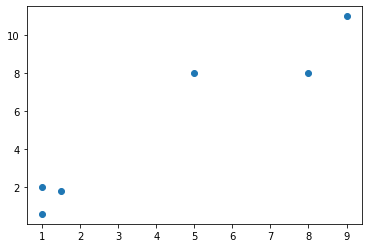

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 训练数据
x = np.array([ [1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11] ])
plt.scatter(x[:,0],x[:,1])
# 预测数据
predict = [[2,1], [6,9]]
plt.show()


In [2]:
import numpy as p
import copy
class KMeans :
    # k个分类，max_iter 最大迭代次数，min_error 
    def __init__(self,k,max_iter=30,min_error=0.001):
        self.k=k
        self.max_iter=max_iter
        self.min_error=min_error
        # trainX 训练数据
    def fit(self,data):
        self.centers={}
        # 获取前k个点作为初始化中心点
        
        for i in range(self.k):
            self.centers[i]=data[i]
            #
        for i in range(self.max_iter):
            class_k={}
            for k_i in range(self.k):
            
                class_k[k_i]=[]   
            for i in range(len(data)):
                distances=[]
                for  center_key in self.centers:
                 # 欧式距离
                    distances.append(np.sqrt(np.sum((self.centers[center_key]-data[i])**2)))
                # 选出离最近的点，并且分类到该点    
                class_k[distances.index(min(distances))].append(data[i])
            # 拷贝原来的点
            preCenters=copy.deepcopy(self.centers)
            # 取平均值重新计算中心点
            for class_key in class_k:
                self.centers[class_key]=np.average(class_k[class_key],axis=0)
            isBreak=True
            for center_key in range(len(self.centers)):
                 # 如果有一个维二范氏大于最小阈值
                if np.sum((self.centers[center_key]-preCenters[center_key]))**2>self.min_error:
                    isBreak=False
            if isBreak:
                break
    def predict(self,testX):
        result=[]
        for x in testX:
            result.append(self.singlePredict(x))
        return result
    # 单个预测
    def singlePredict(self,testx):      
            distances=[]
            for  center_key in self.centers:
                distances.append(np.sqrt(np.sum((self.centers[center_key]-testx)**2)))
            return distances.index(min(distances))        
kmeans=KMeans(2)
kmeans.fit(x)
print("centers",kmeans.centers)

print("预测结果",kmeans.predict(predict)) 

centers {0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
预测结果 [0, 1]


In [3]:
from sklearn.cluster import KMeans
# sklearn 下的KMeans
kmeans = KMeans(2)
kmeans.fit(x)
centers=kmeans.cluster_centers_
print("sklean kmean",centers)
preLabels=kmeans.predict(predict)
print("sklean预测结果",preLabels)

sklean kmean [[1.16666667 1.46666667]
 [7.33333333 9.        ]]
sklean预测结果 [0 1]
